# Modelos de Probabilidad

## Probabilidad lineal

En este caso la variable dependiente es una dummy


<img src="images/RL_Im7.png" width="500" height="300">

Se trata de modelos del tipo:

$$
D_{i} = \beta_{0}+\beta_{1}X_{1i}+u_{i}
$$

Veamos un ejemplo: Abrir la base `MROZ` de Wooldridge y ajuste el modelo:

$$
inlf=\beta_0nwifeinc+\beta_1educ + \beta_2exper +\beta_3expersq + \beta_4age + \beta_5kidslt6 + \beta_6kidsge6
$$

In [1]:
# Importa la biblioteca pandas para manipulación y análisis de datos
import pandas as pd

# Importa matplotlib para generación de gráficos
import matplotlib.pyplot as plt

# Importa numpy para operaciones numéricas y manejo de arrays
import numpy as np

# Configuración opcional de numpy para mostrar arrays con 2 decimales (comentada)
# np.set_printoptions(precision=2)

# Define la URL del archivo CSV con los datos del estudio Mroz
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/mroz.csv"

# Carga el archivo CSV desde la URL en un DataFrame de pandas, sin encabezado (header=None)
datos = pd.read_csv(uu, header=None)

# Asigna nombres descriptivos a las columnas del DataFrame
datos.columns = ["inlf", "hours", "kidslt6", "kidsge6", 
                 "age", "educ", "wage",
                 "repwage", "hushrs", "husage", "huseduc",
                 "huswage", "faminc", "mtr", "motheduc",
                 "fatheduc", "unem", "city", "exper", 
                 "nwifeinc", "lwage", "expersq"]

# Importa la API de fórmulas de statsmodels para estimar modelos de regresión
import statsmodels.formula.api as smf

# Importa función para añadir líneas de regresión a gráficos
from statsmodels.graphics.regressionplots import abline_plot

# Importa el módulo de estadística de scipy para funciones estadísticas
from scipy import stats

# Define y ajusta un modelo de regresión lineal usando la fórmula especificada
# La variable dependiente es "inlf" (participación laboral femenina)
# Las variables independientes son ingreso no laboral de la esposa, educación,
# experiencia laboral, su cuadrado, edad, número de hijos menores de 6 y mayores de 6
reg1 = smf.ols('inlf ~ nwifeinc + educ + exper + expersq + age + kidslt6 + kidsge6', data=datos).fit()

print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           6.90e-46
Time:                        06:05:26   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5855      0.154      3.798      0.0

¿Qué hemos ajustado?

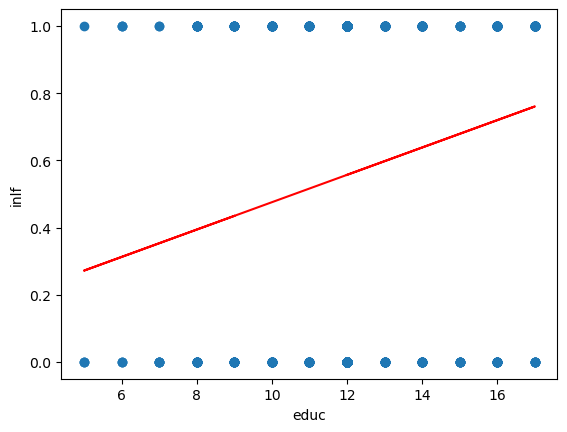

In [2]:
aux = smf.ols('inlf ~ educ',data = datos).fit()

plt.figure()
plt.plot(datos.educ,datos.inlf,'o');
plt.plot(datos.educ,aux.fittedvalues,'-',color='r');
plt.xlabel('educ');
plt.ylabel('inlf');



- Excepto *kidsge6* los coeficientes son significativos.
- Se introdujo la experiencia cuadrática para capturar un efecto decreciente en el efecto deseado (`inlf`). ¿Cómo lo interpretamos?

`.039 - 2(.0006)exper = 0.39 - .0012exper`

- El punto en el que la experiencia ya no tiene efecto en `inlf` es $.039/.0012 = 32.5$. ¿Cuantos elementos de la muestra tienen más de 32 años de experiencia?


Se añade exper al cuadrado porque queremos dar la posibilidad que los años adicionales de expericnecia contribuyan con un efecto decreciente.

Trabajemos ahora con la predicción, y revisemos el resultado:

In [3]:
pred_vals = reg1.predict()
aux = list(zip(datos.inlf,pred_vals))
print(aux[0:5])


stats.describe(pred_vals)

[(1, 0.6636123221355532), (1, 0.700916572727416), (1, 0.6727286212890488), (1, 0.7257441305286614), (1, 0.5616358247349613)]


DescribeResult(nobs=753, minmax=(-0.34511026465740635, 1.1271505290421107), mean=0.5683930942895071, variance=0.06490433214015512, skewness=-0.42412518180534475, kurtosis=-0.07391834122183871)

¿Qué podemos notar?


- Existen valores mayores a 1 e inferiores a 0.
- $R^{2}$ ya no es interpretable en estas regresiones.
- Usaremos una probabilidad de ocurrencia, digamos 0.5

In [4]:
prediccion_dum = (pred_vals>=0.5)*1

tab = pd.crosstab(datos.inlf,prediccion_dum)
(tab.iloc[0,0]+tab.iloc[1,1])/datos.shape[0]

0.7343957503320053

## Logit

La regresión logística puede entenderse simplemente como encontrar los parámtros $\beta$ que mejor asjuten:

$$
y={\begin{cases}1&\beta_{1}+\beta_{2}X_{1}+\cdots+\beta_{k}X_{k}+u >0\\0&{\text{en otro caso}}\end{cases}}
$$

Donde se asume que el error tiene una [distribución logística estándar](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log%C3%ADstica)

$$
{\displaystyle f(x;\mu ,s)={\frac {e^{-{\frac {x-\mu }{s}}}}{s\left(1+e^{-{\frac {x-\mu }{s}}}\right)^{2}}}={\frac {1}{s\left(e^{\frac {x-\mu }{2s}}+e^{-{\frac {x-\mu }{2s}}}\right)^{2}}}={\frac {1}{4s}}\operatorname {sech} ^{2}\!\left({\frac {x-\mu }{2s}}\right).}
$$

Donde $s$ es el parámetro de escala y $\mu$ el de locación (*sech* es la función secante hiperbólico).


Otra forma de entender la regresión logística es a través de la función logística:

$$
\sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}
$$

donde $t\in \mathbb{R}$ y $0\leq\sigma (t)\leq1$.

Asumiento $t$ como una función lineal de una variable explicativa $x$, tenemos:

$$
t=\beta _{0}+\beta _{1}x
$$

Ahora la función logística se puede expresar:

$$
p(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}
$$

Ten en cuenta que $p (x)$ se interpreta como la probabilidad de que la variable dependiente iguale a *éxito*  en lugar de un *fracaso*. Está claro que las variables de respuesta $Y_ {i}$ no se distribuyen de forma idéntica: $ P (Y_ {i} = 1 \ mid X )$ difiere de un punto $X_ {i}$ a otro, aunque son independientes dado que la matriz de diseño $X$ y los parámetros compartidos $\beta$.

Finalmente definimos la inversa de la función logística, $g$, el **logit** (log odds):

$$
{\displaystyle g(p(x))=\ln \left({\frac {p(x)}{1-p(x)}}\right)=\beta _{0}+\beta _{1}x,}
$$

lo que es equivalente a:

$$
{\frac {p(x)}{1-p(x)}}=e^{\beta _{0}+\beta _{1}x}
$$

**Interpretación**:

-   $g$ es la función logit. La ecuación para $g (p (x))$ ilustra que el logit (es decir, log-odds o logaritmo natural de las probabilidades) es equivalente a la expresión de regresión lineal.
-   $ln$ denota el logaritmo natural.
-   $p (x)$ es la probabilidad de que la variable dependiente sea igual a un caso, dada alguna combinación lineal de los predictores. La fórmula para $p (x)$ ilustra que la probabilidad de que la variable dependiente iguale un caso es igual al valor de la función logística de la expresión de regresión lineal. Esto es importante porque muestra que el valor de la expresión de regresión lineal puede variar de infinito negativo a positivo y, sin embargo, después de la transformación, la expresión resultante para la probabilidad $p (x)$ oscila entre $0$ y $1$.
-   $\beta _ {0}$ es la intersección de la ecuación de regresión lineal (el valor del criterio cuando el predictor es igual a cero).
-   $\beta _ {1} x$ es el coeficiente de regresión multiplicado por algún valor del predictor.
-   la base $e$ denota la función exponencial.

### Ejemplo 1

Abra la tabla 15.7 


-   Los datos son el efecto del Sistema de Enseñanza Personalizada (PSI) sobre las calificaciones.
    -   Calificación $Y = 1$ si la calificación final fue A
    -   $Y = 0$ si la calificación final fue B o C
    -   `TUCE` = calificación en un examen presentado al comienzo del curso para evaluar los conocimientos previos de macroeconomía
    -   `PSI` = 1 con el nuevo método de enseñanza, 0 en otro caso
    -   `GPA` = promedio de puntos de calificación inicial
-   Ajuste el siguiente modelo:
`smf.logit('GRADE ~ GPA + TUCE + PSI',data = datos).fit()`
-   Interprete el modelo


En los modelos cuya variable regresada binaria, la bondad del ajuste tiene una importancia secundaria. Lo que interesa son los signos esperados de los coeficientes de la regresión y su importancia práctica y/o estadística.


Importamos los datos y revisamos la variable dependiente:

In [5]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla15_7.csv"
datos = pd.read_csv(uu,sep = ';')
datos.columns

# import statsmodels.api as sm
datos.pivot_table(index = 'GRADE', aggfunc = [len])

len                    
      GPA LETTER OBS PSI TUCE
GRADE                        
0      21     21  21  21   21
1      11     11  11  11   11

Ajustamos el modelo:

In [6]:
ajuste1 = smf.logit('GRADE ~ GPA + TUCE + PSI',data = datos).fit()

print(ajuste1.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.3740
Time:                        06:05:26   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.

In [7]:
ajuste1.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  GRADE
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.5339      0.237      2.252      0.024       0.069       0.998
TUCE           0.0180      0.026      0.685      0.493      -0.033       0.069
PSI            0.4493      0.197      2.284      0.022       0.064       0.835
==============================================================================
"""

In [8]:
mm = ajuste1.get_margeff(at='all').margeff
mm[0:10,:]

array([[0.07311607, 0.00246188, 0.06154047],
       [0.15815168, 0.0053251 , 0.1331134 ],
       [0.43011639, 0.01448239, 0.36202116],
       [0.07130492, 0.0024009 , 0.06001605],
       [0.69272252, 0.02332457, 0.58305197],
       [0.09507939, 0.00320141, 0.08002659],
       [0.0729182 , 0.00245522, 0.06137393],
       [0.1381988 , 0.00465327, 0.11631942],
       [0.2791564 , 0.00939944, 0.23496087],
       [0.60069976, 0.02022608, 0.50559808]])

¿Son, en conjunto, los coeficientes significativos?

In [9]:
hyp = '(Intercept = 0, GPA = 0,TUCE=0,PSI=0)'
ajuste1.wald_test(hyp,scalar = True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=8.873128862019758, p-value=0.06435007959303814, df_denom=4>

In [10]:
np.exp(ajuste1.params)

Intercept     0.000002
GPA          16.879715
TUCE          1.099832
PSI          10.790732
dtype: float64

Esto indica que los estudiantes expuestos al nuevo método de enseñanza son 10 veces más propensos a obtener una A que quienes no están expuestos al nuevo método, en tanto no cambien los demás factores.

In [11]:
ajuste1.predict(which = 'linear')

array([-3.60073413, -2.76041291, -1.46791368, -3.62720615,  0.28141441,
       -3.32098459, -3.60359585, -2.91209282, -2.07928416,  0.81658669,
       -3.68551751, -1.45002683, -0.74349868, -1.42927827, -0.5710702 ,
       -3.46980278, -2.87059569, -3.21545265,  0.3634383 ,  0.66679813,
       -2.72739871,  2.25228291, -1.14298655,  1.7510952 ,  1.64556325,
       -0.0755037 ,  0.55554274, -0.8131547 ,  1.67096266,  2.85041739,
        0.11660073, -2.08025454])

### Ejemplo 2

Este ejemplo tiene por objetivo lograr la mejor predicción de actividades ilícitas (Uafe). Para ello cuentan con un conjunto de datos de entrenamiento:


- codigoCliente:	Identificación del cliente
- sumValTot:	Suma del valor transaccionado al mes
- Frecuencia:	Número de transacciones del mes
- edad:	Edad del cliente
- estadoCivil:	C: Casada, D: Divorciada, N & missing: Sin info, S: Soltera, U: Unida, V: viuda
- nivelEducacion:	missing o N: Sin info, P o S: primaria o secundaria, Sup: Superior
- sexo:	F: Femenino, M: Masculino
- tipoVivienda:	P: Propia, NP: No propia
- nivelIngresos:	Ingresos del cliente
- Uafe	1: sospechosa, 0: no sospechosa


#### Paso 1: lectura de datos

In [12]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/refs/heads/master/challengeTrainUafe.csv"
datos = pd.read_csv(uu,sep = ",")
datos.describe()

,codigoCliente,sumValTot,Frecuencia,edad,nivelIngresos,Uafe
count,53871.000000,53871.000000,53871.000000,53871.000000,53871.000000,53871.000000
mean,330632.616937,2607.336492,13.792040,43.990559,1080.108966,0.049192
std,214567.625599,7885.583015,12.211262,14.429626,4759.779271,0.216270
min,1.000000,0.000000,1.000000,7.553425,0.000000,0.000000
25%,40082.500000,251.045000,4.000000,32.531507,537.480000,0.000000
50%,444937.000000,1528.440000,11.000000,40.238356,849.150000,0.000000
75%,484662.000000,2430.470000,20.000000,51.857534,1186.490000,0.000000
max,570579.000000,342658.560000,148.000000,122.591781,849019.000000,1.000000


#### Paso 2: Separación de datos en entrenamieto y prueba



In [13]:
# Importa la función train_test_split del módulo model_selection de scikit-learn
# Esta función permite dividir un conjunto de datos en subconjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Divide el DataFrame 'datos' en dos subconjuntos: entrenamiento (train_df) y prueba (test_df)
# El parámetro random_state=0 garantiza que la partición sea reproducible (misma división cada vez que se ejecuta)
train_df, test_df = train_test_split(datos, random_state=0)


#### Paso 3: Exploración de datos y selección de variables

In [14]:
#pip install sweetviz
import sweetviz as sv

#my_report = sv.analyze(train_df)
my_report = sv.compare([train_df,'Train'],[test_df,'Test'],target_feat = 'Uafe')
my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Paso 4: Selección de variables

In [15]:
# Importa dos funciones estadísticas de scipy:
# ks_2samp: para realizar la prueba de Kolmogorov-Smirnov entre dos muestras
# chi2_contingency: para realizar pruebas de chi-cuadrado en tablas de contingencia (no se usa aquí, pero está importada)
from scipy.stats import ks_2samp, chi2_contingency

# Comentario: Se realizará la prueba KS para comparar la distribución de variables continuas entre dos grupos definidos por la variable 'Uafe'

# Se crea un diccionario vacío para almacenar los resultados de la prueba KS para cada variable
ks_results = {}

# Se itera sobre las columnas numéricas seleccionadas
for column in ['sumValTot', 'Frecuencia', 'edad', 'nivelIngresos']:
    # Se seleccionan los valores de la variable actual solo para el grupo Uafe == 0
    group0 = train_df[train_df['Uafe'] == 0][column]
    
    # Se seleccionan los valores de la variable actual solo para el grupo Uafe == 1
    group1 = train_df[train_df['Uafe'] == 1][column]
    
    # Se aplica la prueba de Kolmogorov-Smirnov para comparar si las dos muestras vienen de la misma distribución
    ks_stat, ks_pvalue = ks_2samp(group0, group1)
    
    # Se guardan el estadístico y el p-valor en el diccionario bajo el nombre de la variable
    ks_results[column] = (ks_stat, ks_pvalue)

# Se imprime el diccionario con los resultados de la prueba KS para cada variable
ks_results


{'sumValTot': (0.17290718018142842, 1.0048834804337842e-49),
 'Frecuencia': (0.11513715049095713, 3.254205628336455e-22),
 'edad': (0.1312846698783937, 8.96037182115701e-29),
 'nivelIngresos': (0.22921117173977315, 1.7264084511184317e-87)}

In [16]:
# Prueba de Chi-Cuadrado para variables categóricas
# Importante: esta prueba evalúa si existe una relación significativa entre dos variables categóricas

# Se crea un diccionario vacío para almacenar los resultados de cada variable
chi2_results = {}

# Se itera sobre cada una de las variables categóricas especificadas
for column in ['estadoCivil', 'nivelEducacion', 'sexo', 'tipoVivienda']:
    
    # Se construye una tabla de contingencia que cruza cada categoría de la variable con los valores de 'Uafe'
    contingency_table = pd.crosstab(train_df[column], train_df['Uafe'])
    
    # Se aplica la prueba de chi-cuadrado sobre la tabla de contingencia
    # Esta prueba devuelve: estadístico, p-valor, grados de libertad, y frecuencias esperadas
    chi2_stat, chi2_pvalue, _, _ = chi2_contingency(contingency_table)
    
    # Se almacenan el estadístico y el p-valor en el diccionario con el nombre de la variable como clave
    chi2_results[column] = (chi2_stat, chi2_pvalue)

# Se imprime el diccionario con los resultados de la prueba de Chi-Cuadrado para cada variable categórica
chi2_results


{'estadoCivil': (76.6598679377394, 1.7466999003822897e-14),
 'nivelEducacion': (65.9457747501759, 4.786928719287691e-15),
 'sexo': (0.0, 1.0),
 'tipoVivienda': (190.52545850499502, 2.441381309048441e-43)}

#### Paso 5: Entrenar un modelo con variables seleccionadas

In [17]:
# Importa numpy para operaciones numéricas
import numpy as np

# Importa funciones para dividir los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

# Importa transformadores para escalar variables numéricas y codificar categóricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Permite aplicar distintos transformadores a diferentes columnas
from sklearn.compose import ColumnTransformer

# Permite encadenar pasos de procesamiento y modelado en un solo objeto
from sklearn.pipeline import Pipeline

# Importa el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Importa métricas para evaluar el desempeño del modelo
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

# Para generar gráficos (como la curva ROC)
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# DEFINICIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTE
# ---------------------------------------------------------

# Se seleccionan las variables predictoras (características) del DataFrame de entrenamiento
X = train_df[['sumValTot', 'Frecuencia', 'edad', 'nivelIngresos', 
              'estadoCivil', 'nivelEducacion', 'tipoVivienda']]

# Se define la variable objetivo (etiqueta a predecir)
y = train_df['Uafe']

# ---------------------------------------------------------
# DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN
# ---------------------------------------------------------

# Se divide el conjunto de datos en entrenamiento y validación (80%-20%)
# El parámetro random_state=42 garantiza reproducibilidad
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# DEFINICIÓN DEL PREPROCESAMIENTO
# ---------------------------------------------------------

# Lista de características numéricas a escalar
numeric_features = ['sumValTot', 'Frecuencia', 'edad', 'nivelIngresos']

# Lista de características categóricas a codificar
categorical_features = ['estadoCivil', 'nivelEducacion', 'tipoVivienda']

# Se define un transformador de columnas:
# Escala las numéricas con StandardScaler y codifica las categóricas con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),     # Escalamiento estándar
        ('cat', OneHotEncoder(), categorical_features)   # Codificación one-hot
    ])

# ---------------------------------------------------------
# CREACIÓN DEL PIPELINE COMPLETO
# ---------------------------------------------------------

# Se construye un pipeline que primero preprocesa y luego aplica regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                     # Paso 1: preprocesamiento
    ('classifier', LogisticRegression(max_iter=1000))   # Paso 2: modelo de clasificación
])

# ---------------------------------------------------------
# ENTRENAMIENTO DEL MODELO
# ---------------------------------------------------------

# Se entrena el pipeline completo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# ---------------------------------------------------------
# PREDICCIÓN Y PROBABILIDADES
# ---------------------------------------------------------

# Se generan predicciones finales (clase 0 o 1)
y_pred = pipeline.predict(X_val)

# Se generan probabilidades de pertenecer a la clase 1 (necesarias para curvas ROC)
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]


Ahora vemos las probabilidades predichas:

                 0
count  8081.000000
mean      0.050014
std       0.025465
min       0.005897
25%       0.034214
50%       0.043393
75%       0.061111
max       0.999984


<Axes: ylabel='Count'>

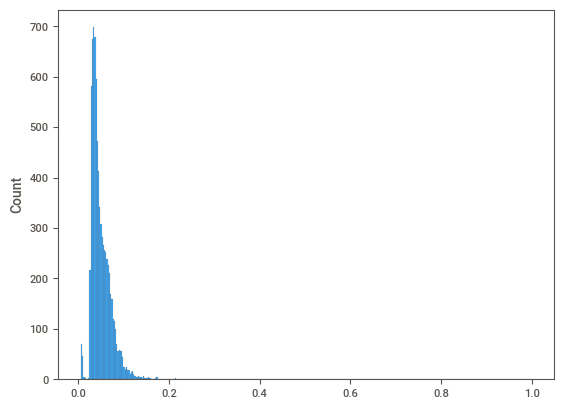

In [18]:
#pd.DataFrame(y_pred).describe()
# Muestra un resumen estadístico (mínimo, percentiles, media, etc.)
# de las probabilidades predichas para la clase positiva (Uafe=1)
print(pd.DataFrame(y_pred_prob).describe())

# Importa la biblioteca Seaborn para visualización estadística
import seaborn as sns

# Genera un histograma para visualizar la distribución de las probabilidades predichas
# Esto ayuda a entender cuántos casos son clasificados con alta, media o baja probabilidad
sns.histplot(y_pred_prob)


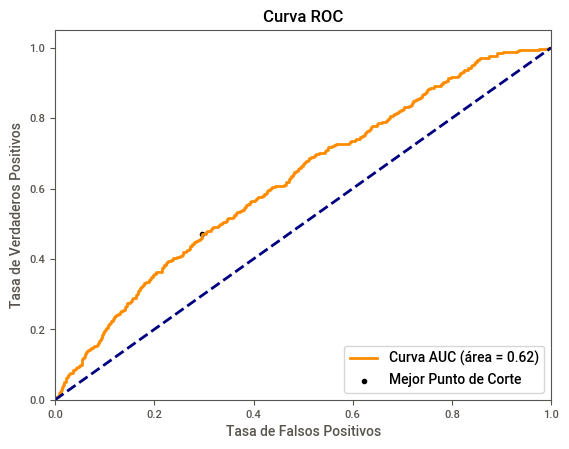

Mejor punto de corte: 0.056425144999863654


In [19]:
# Calcular la curva ROC:
# fpr: tasa de falsos positivos
# tpr: tasa de verdaderos positivos
# thresholds: umbrales evaluados por el modelo para generar la curva
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC), que mide la capacidad predictiva global del modelo
roc_auc = roc_auc_score(y_val, y_pred_prob)

# ---------------------------------------------
# ENCONTRAR EL MEJOR UMBRAL (PUNTO DE CORTE)
# ---------------------------------------------

# Índice de Youden: J = Sensibilidad - (1 - Especificidad) = TPR - FPR
# El mejor umbral es aquel que maximiza esta diferencia
J = tpr - fpr

# Encuentra el índice del valor máximo de J
ix = np.argmax(J)

# Selecciona el mejor umbral correspondiente
best_threshold = thresholds[ix]

# ---------------------------------------------
# GRAFICAR LA CURVA ROC CON EL MEJOR PUNTO
# ---------------------------------------------

# Crea una nueva figura para graficar
plt.figure()

# Traza la curva ROC (TPR vs. FPR)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Curva AUC (área = %0.2f)' % roc_auc)

# Línea diagonal que representa un modelo aleatorio (sin capacidad predictiva)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Dibuja el punto correspondiente al mejor umbral
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Mejor Punto de Corte')

# Ajustes del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Muestra el gráfico
plt.show()

# Imprime el mejor umbral encontrado según el índice de Youden
print('Mejor punto de corte:', best_threshold)


In [20]:
# -----------------------------------------------------
# GENERAR PREDICCIONES BINARIAS CON EL MEJOR UMBRAL
# -----------------------------------------------------

# Convierte las probabilidades en predicciones binarias (0 o 1)
# Si la probabilidad es mayor o igual al mejor umbral, se predice 1 (positivo), de lo contrario 0
predicciones_binarias = (y_pred_prob >= best_threshold).astype(int)

# -----------------------------------------------------
# REPORTE DE CLASIFICACIÓN
# -----------------------------------------------------

# Genera un reporte con métricas de evaluación:
# Precisión (precision), sensibilidad (recall), F1-score y soporte por clase
classification_rep = classification_report(y_val, predicciones_binarias)

# -----------------------------------------------------
# MATRIZ DE CONFUSIÓN
# -----------------------------------------------------

# Crea la matriz de confusión: compara etiquetas reales vs. predichas
# Devuelve: [[TN, FP], [FN, TP]]
conf_matrix = confusion_matrix(y_val, predicciones_binarias)


In [21]:
#Imprimir la linea devuelve el area bajo la curva ROC, reporte de clasificacion y la matriz de confusión

print("AUC:",roc_auc,"\n") 
print("Matriz de confusión\n",conf_matrix,"\n")
print("Reporte de clasificación\n",classification_rep,"\n")

AUC: 0.6221461259050277 

Matriz de confusión
 [[5424 2286]
 [ 196  175]] 

Reporte de clasificación
               precision    recall  f1-score   support

           0       0.97      0.70      0.81      7710
           1       0.07      0.47      0.12       371

    accuracy                           0.69      8081
   macro avg       0.52      0.59      0.47      8081
weighted avg       0.92      0.69      0.78      8081
 



Ahora se genera la tabla de ganancias (también llamada **tabla de validación** o *lift table*) para train y test, usando los deciles del score predicho (y_pred_prob en test y el equivalente en train). Incluirá:

- Total de observaciones por decil

- Total de "malos" (Uafe = 1)

- Total de "buenos" (Uafe = 0)

- Razón de malos

- Porcentaje acumulado de malos (captura acumulada)

In [22]:
def generar_tabla_ganancias(y_true, y_prob, n_deciles=10):
    # Crear DataFrame con los datos reales y probabilidad predicha
    df = pd.DataFrame({'real': y_true, 'score': y_prob})
    
    # Crear deciles (del 1 al n_deciles), 1 es el más riesgoso (score más alto)
    df['decil'] = pd.qcut(df['score'], q=n_deciles, labels=False, duplicates='drop')
    df['decil'] = n_deciles - df['decil']  # Invertir para que 1 sea el más riesgoso

    # Agrupar por decil
    tabla = df.groupby('decil').agg(
        total=('real', 'count'),
        malos=('real', 'sum')
    ).reset_index()

    # Calcular buenos, razón de malos, y acumulados
    tabla['buenos'] = tabla['total'] - tabla['malos']
    tabla['razon_malos'] = tabla['malos'] / tabla['total']
    tabla['malos_acum'] = tabla['malos'].cumsum()
    tabla['porc_malos_acum'] = 100 * tabla['malos_acum'] / tabla['malos'].sum()
    
    return tabla

# Aplicar para TRAIN
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
tabla_train = generar_tabla_ganancias(y_train, y_train_prob)

# Aplicar para TEST
tabla_test = generar_tabla_ganancias(y_val, y_pred_prob)


print("Tabla de Ganancias - TRAIN")
print(tabla_train)

Tabla de Ganancias - TRAIN
   decil  total  malos  buenos  razon_malos  malos_acum  porc_malos_acum
0      1   3233    314    2919     0.097123         314        19.503106
1      2   3232    246    2986     0.076114         560        34.782609
2      3   3232    180    3052     0.055693         740        45.962733
3      4   3232    163    3069     0.050433         903        56.086957
4      5   3232    147    3085     0.045483        1050        65.217391
5      6   3232    137    3095     0.042389        1187        73.726708
6      7   3232    155    3077     0.047958        1342        83.354037
7      8   3232    155    3077     0.047958        1497        92.981366
8      9   3232     83    3149     0.025681        1580        98.136646
9     10   3233     30    3203     0.009279        1610       100.000000


In [23]:
print("Tabla de Ganancias - TEST")
print(tabla_test)

Tabla de Ganancias - TEST
   decil  total  malos  buenos  razon_malos  malos_acum  porc_malos_acum
0      1    808     68     740     0.084158          68        18.328841
1      2    808     60     748     0.074257         128        34.501348
2      3    808     41     767     0.050743         169        45.552561
3      4    808     37     771     0.045792         206        55.525606
4      5    808     38     770     0.047030         244        65.768194
5      6    808     27     781     0.033416         271        73.045822
6      7    808     33     775     0.040842         304        81.940701
7      8    808     35     773     0.043317         339        91.374663
8      9    808     26     782     0.032178         365        98.382749
9     10    809      6     803     0.007417         371       100.000000


## Probit

En los modelos logia se propuso la logística, en este caso se propone la Función de Distribución Acumulada Normal. Suponga que la variable de respuesta es binaria, 1 o 0. $Y$ podría representar la presencia/ausencia de una condición, éxito/fracaso, si/no. Se tiene también un vector de regresoras $X$, el modelo toma la forma:

$$
{\displaystyle \Pr(Y=1\mid X)=\Phi (X^{T}\beta ),}
$$

donde $Pr$ es la prbabilidad y $\Phi$ distribución acumulada de la normal estándar ${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$. Los parámetros $\beta$ se estiman típicamente con el método de máxima verosimilitud.


**Ejemplo**

In [24]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla15_7.csv"
datos = pd.read_csv(uu,sep = ';')
ajuste1 = smf.probit('GRADE ~ GPA + TUCE + PSI',data = datos).fit()

print(ajuste1.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                         Probit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.3775
Time:                        06:05:30   Log-Likelihood:                -12.819
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001405
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4523      2.542     -2.931      0.003     -12.435      -2.469
GPA            1.6258      0.

In [25]:
ajuste1.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                  GRADE
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.5333      0.232      2.294      0.022       0.078       0.989
TUCE           0.0170      0.027      0.626      0.531      -0.036       0.070
PSI            0.4679      0.188      2.494      0.013       0.100       0.836
==============================================================================
"""

In [26]:
mm = ajuste1.get_margeff(at='all').margeff
mm[0:10,:]

array([[0.07255307, 0.00230845, 0.06365122],
       [0.17584323, 0.00559486, 0.15426826],
       [0.44108314, 0.01403409, 0.38696473],
       [0.07391114, 0.00235166, 0.06484266],
       [0.64252589, 0.02044346, 0.5636916 ],
       [0.10206861, 0.00324755, 0.08954537],
       [0.07368267, 0.00234439, 0.06464222],
       [0.15292232, 0.00486558, 0.13415961],
       [0.3033272 , 0.00965106, 0.26611067],
       [0.59359928, 0.01888675, 0.520768  ]])

In [27]:
ajuste1.predict(which = 'linear')

array([-2.09308603, -1.61569183, -0.87816803, -2.08420699,  0.13722837,
       -1.92311086, -2.08569187, -1.69993698, -1.23289159,  0.42099513,
       -2.14186033, -0.86486457, -0.45841206, -0.85895528, -0.36825763,
       -2.01475018, -1.6881184 , -1.86842727,  0.23630576,  0.40479606,
       -1.53878182,  1.30785551, -0.60319106,  1.02555852,  0.97087493,
       -0.02826337,  0.3649008 , -0.44357981,  0.99452719,  1.6670186 ,
        0.10033167, -1.15745135])